In [1]:
# importing pandas module for analysis
import pandas as pd

In [2]:
# loading required csv files or data
titanic = pd.read_csv('E:\\software\\files\\titanic\\gender_submission.csv')
train = pd.read_csv('E:\\software\\files\\titanic\\train.csv')
test = pd.read_csv('E:\\software\\files\\titanic\\test.csv')

In [3]:
train.info() # taking some info from data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [4]:
# showing maximun columns and rows inthe notebook

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [7]:
import seaborn as sns # importing seaborn for data visualisation

In [8]:
import matplotlib.pyplot as plt # matplotlib for data visualisation also

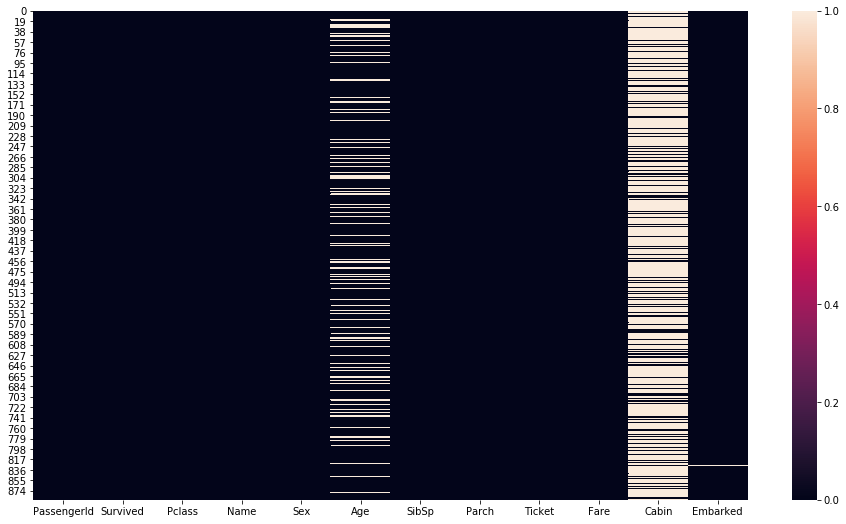

In [9]:
plt.figure(figsize=(16,9))   # to raise the figure size 
sns.heatmap(train.isnull()) # generating heat map 

In [10]:
train.isnull().sum()   #checking null values count

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# calculating percentage of missing data
prec_var = train.isnull().sum() / train.shape[0] * 100
prec_var

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [12]:
# removing column having missing value more than 19%
null_var = prec_var[prec_var > 19].keys()
null_var
        
    

Index(['Age', 'Cabin'], dtype='object')

In [13]:
drop_col = train.drop(columns= null_var) # dropped unnecessary data from columns or data missed columns

In [14]:
drop_col.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [15]:
drop_row_clean = drop_col.dropna(axis= 0) # dropped rows having missed data

In [16]:
drop_row_clean.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

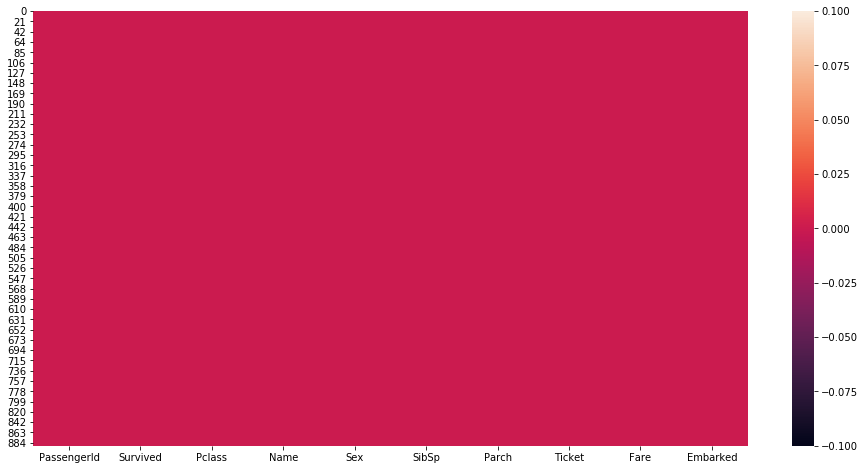

In [17]:
plt.figure(figsize=(16,8))
sns.heatmap(drop_row_clean.isnull())

In [18]:
cleaned_data = drop_row_clean.copy() # changed the variable name here by making copy of older data frame
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(1), int64(5), object(4)
memory usage: 62.5+ KB


In [19]:
cleaned_data.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S


In [20]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [21]:
cleaned_data['Embarked'] = encoder.fit_transform(cleaned_data['Embarked'])
cleaned_data['Sex'] = encoder.fit_transform(cleaned_data['Sex'])

In [22]:
len(cleaned_data.columns)

10

In [23]:
cleaned_data.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,8.0500,2


In [24]:
cleaned_data_int  = cleaned_data.drop(columns= cleaned_data.select_dtypes(include='object').columns, axis = 1)

In [25]:
cleaned_data_int.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,1,0,3,1,1,0,7.2500,2
1,2,1,1,0,1,0,71.2833,0
2,3,1,3,0,0,0,7.9250,2
3,4,1,1,0,1,0,53.1000,2
4,5,0,3,1,0,0,8.0500,2


In [26]:
X = cleaned_data_int.drop(columns='Survived',axis = 1)
Y = cleaned_data_int.iloc[:,1:2]
Y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [29]:
from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,y_test = train_test_split(X,Y, test_size = 0.2, random_state=0)

# building model here

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
modelD = DecisionTreeClassifier().fit(X_train,Y_train)

In [31]:
y_pred = modelD.predict(x_test)

In [32]:
from sklearn.metrics import confusion_matrix,accuracy_score
matrix = confusion_matrix(y_test, y_pred)

In [33]:
matrix

array([[77, 28],
       [29, 44]], dtype=int64)

In [34]:
score = accuracy_score(y_test, y_pred)
score

0.6797752808988764

In [53]:
from sklearn.model_selection import cross_val_score
knnscores = []
for i in range(1,21):
    Knn = KNeighborsClassifier(n_neighbors= i)
    scores = cross_val_score(Knn ,X_train,Y_train, cv = 10)
    knnscores.append(scores.mean())


C:\Users\Anshul Pratap\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anshul Pratap\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anshul Pratap\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anshul Pratap\AppData\Roaming\Python\Pyt

C:\Users\Anshul Pratap\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anshul Pratap\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anshul Pratap\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anshul Pratap\AppData\Roaming\Python\Pyt

C:\Users\Anshul Pratap\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anshul Pratap\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anshul Pratap\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anshul Pratap\AppData\Roaming\Python\Pyt

C:\Users\Anshul Pratap\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anshul Pratap\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anshul Pratap\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anshul Pratap\AppData\Roaming\Python\Pyt

C:\Users\Anshul Pratap\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anshul Pratap\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anshul Pratap\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anshul Pratap\AppData\Roaming\Python\Pyt

C:\Users\Anshul Pratap\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anshul Pratap\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anshul Pratap\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anshul Pratap\AppData\Roaming\Python\Pyt

C:\Users\Anshul Pratap\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anshul Pratap\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anshul Pratap\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anshul Pratap\AppData\Roaming\Python\Pyt

In [54]:
max(knnscores)

0.6779147104851331

Text(0.5, 1.0, 'Finding best Accuracy by ploting graph')

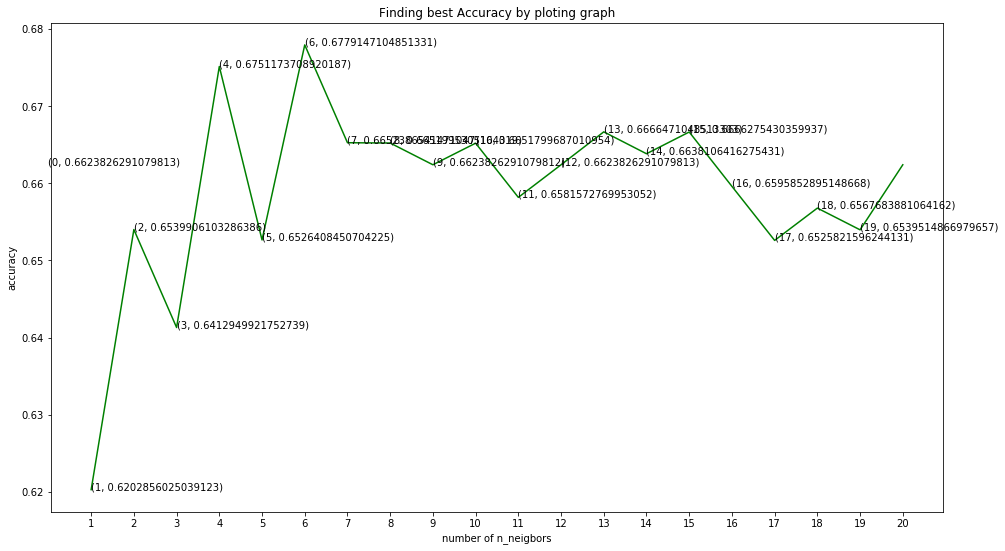

In [60]:
plt.figure(figsize= (16,9))
plt.plot([i for i in range(1,21)], knnscores ,color='green')
for i in range(len(knnscores)):
    plt.text(i,knnscores[i-1],(i, knnscores[i-1]))
    
plt.xticks([i for i in range(1,21)])
plt.xlabel('number of n_neigbors')
plt.ylabel('accuracy')
plt.title('Finding best Accuracy by ploting graph')

    